In [29]:
import os
import cv2
import tensorflow as tf
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from config import imshape, model_name, n_classes
from models import preprocess_input, dice
from tensorflow.keras.utils import to_categorical
from utils import add_masks
import matplotlib.pyplot as plt

In [16]:
model = load_model(os.path.join('models', 'unet_multi.model'),
                   custom_objects={'dice': dice})

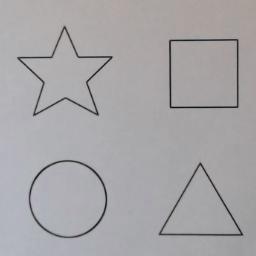

In [20]:
img_bgr = cv2.imread('images/0.jpg')
Image.fromarray(img_bgr)

In [22]:
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img.shape)

(256, 256, 3)


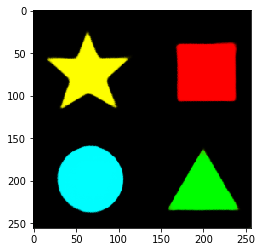

In [35]:
# only predictions on black background
tmp = np.expand_dims(img, axis=0)
roi_pred = model.predict(tmp)
roi_mask = roi_pred.squeeze() * 255.0
roi_mask = add_masks(roi_mask)
plt.imshow(roi_mask)
plt.show()

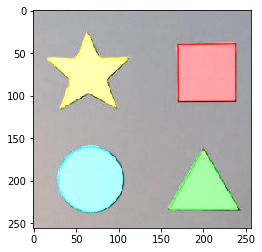

In [36]:
# remove background
roi_mask = np.array(roi_mask, dtype=np.uint8)
roi_mask = cv2.addWeighted(img, 1.0, roi_mask, 1.0, 0)
plt.imshow(roi_mask)
plt.show()